In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
print(df)

Saving heart.csv to heart (2).csv
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

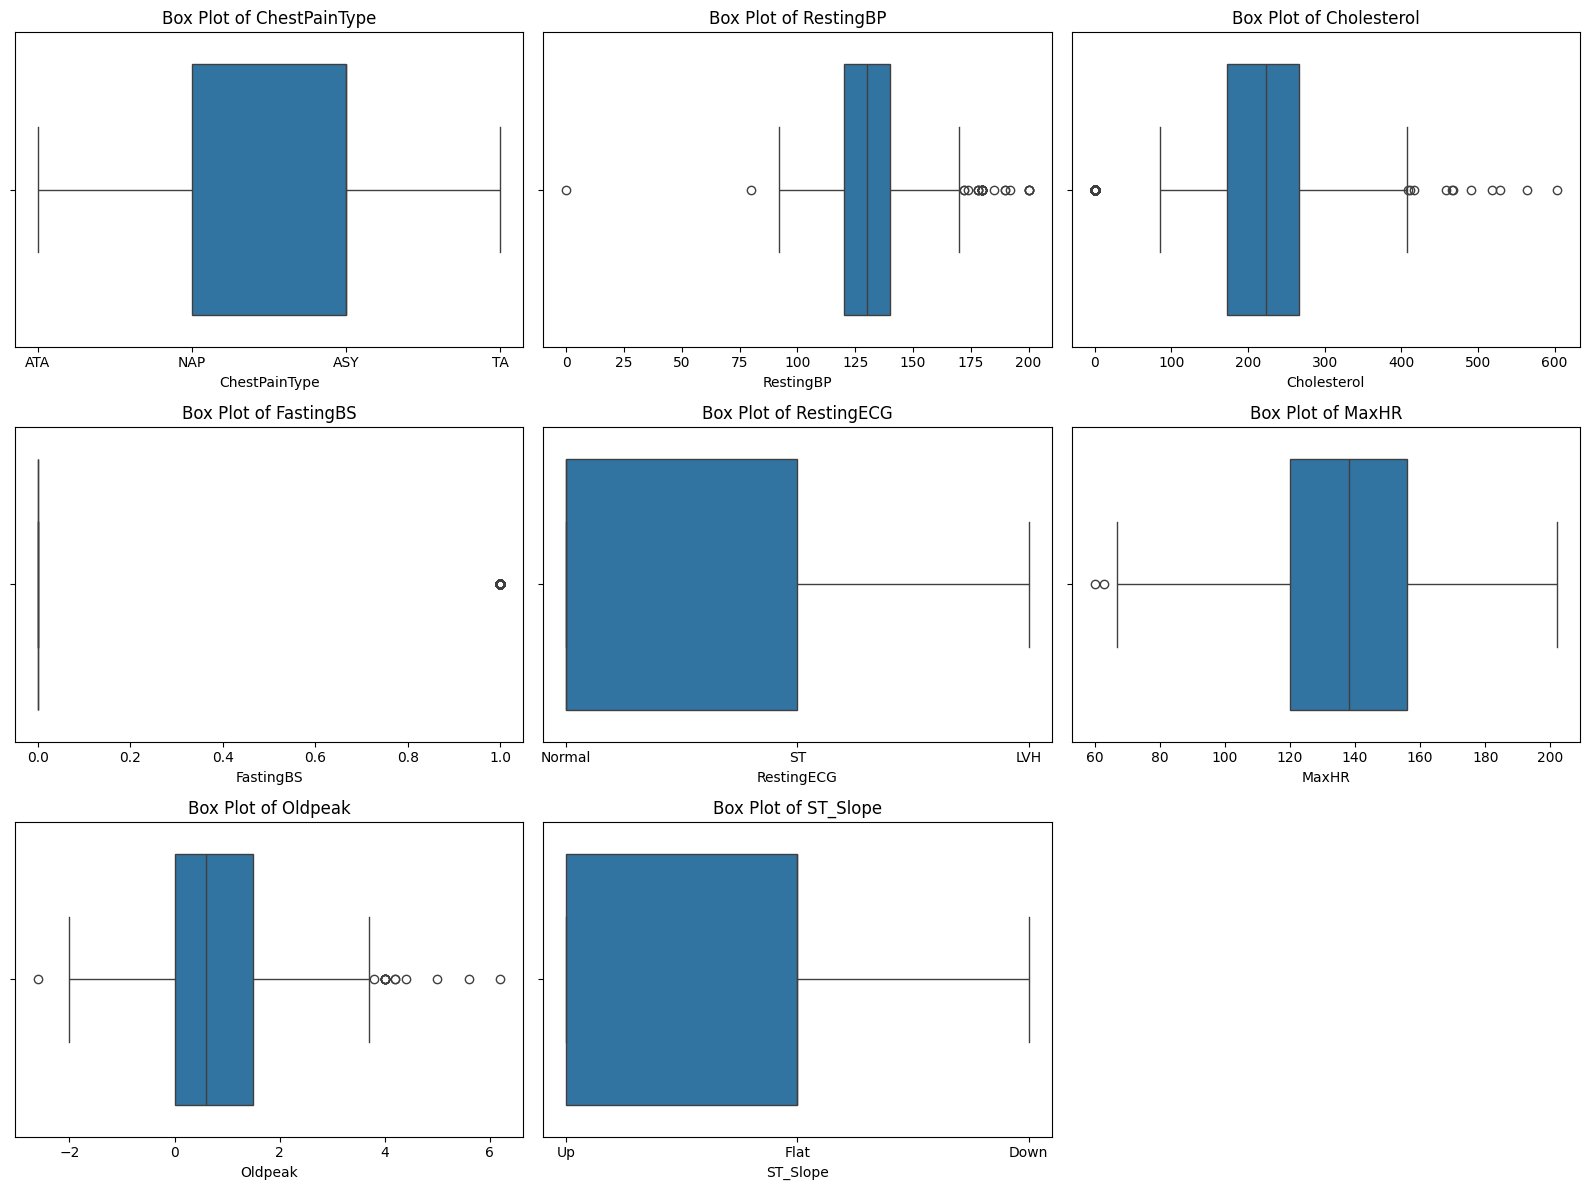

Outliers in RestingBP:
     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


Outliers in Cholesterol:
     Cholesterol
28           468
30           518
69           412
76           529
103          466
..           ...
535            0
536            0
616          564
667          417
796          409

[183 rows x 1 columns]


Outliers in FastingBS:
     FastingBS
36           1
38           1
52           1
84           1
86           1
..         ...
887          1
888          1
901          1
911          1
914          1

[214 rows x 1 columns]


Outliers in MaxHR:
     MaxHR
370     63
390     60


Ou

<ipython-input-30-65cb38448fc1>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-30-65cb38448fc1>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-30-65cb38448fc1>:49: Future

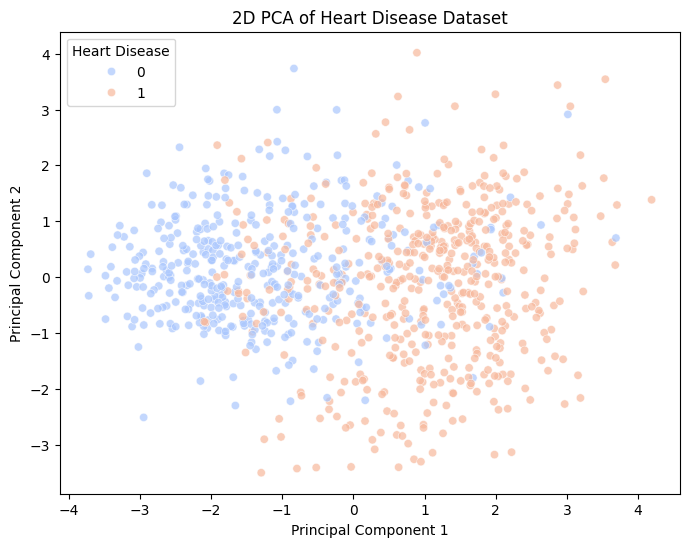

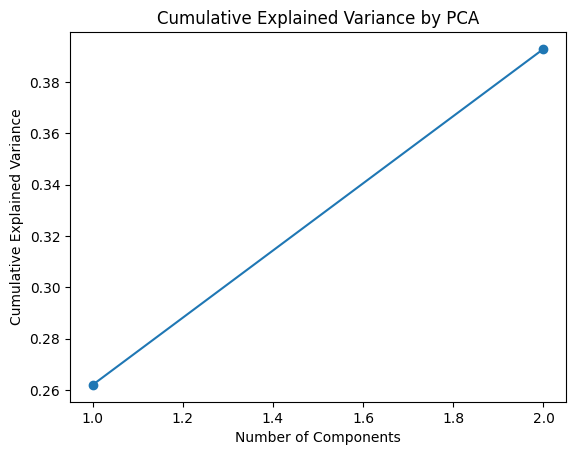

In [30]:
columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
           'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

# Create box plots for each column
plt.figure(figsize=(16, 12))
num_cols = len(columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust number of rows based on columns
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Arrange in a grid of dynamic rows and 3 columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# Function to identify outliers based on IQR
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Ensure the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers for each feature
outliers = identify_outliers(df, columns)

# Print the outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]])  # Print only the outlier values for the column
    print("\n")

# Check for null values
print(df.isnull().sum())

# Print data types of columns
print(df.dtypes)

# Dataset information and summary statistics
df.info()
print(df.describe())

# Encode categorical features to numeric
df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Display the first 10 rows of the dataset
print(df.head(10))

# Separate the target variable from the features
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Add target variable for visualization

# Plot the 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [28]:
# # Function to remove outliers based on IQR
# def remove_outliers(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)  # First quartile
#         Q3 = df[col].quantile(0.75)  # Third quartile
#         IQR = Q3 - Q1  # Interquartile range
#         lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
#         upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

#         # Filter the DataFrame to exclude outliers
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     return df

# # Remove outliers from the dataset
# df_cleaned = remove_outliers(df, columns)

# # Verify the changes by checking the shape of the dataset
# print("Original dataset shape:", df.shape)
# print("Cleaned dataset shape:", df_cleaned.shape)

# # Re-plot the box plots for cleaned data
# plt.figure(figsize=(16, 12))
# for i, col in enumerate(columns, 1):
#     plt.subplot(4, 3, i)  # Arrange in a grid of 4 rows and 3 columns
#     sns.boxplot(data=df_cleaned, x=col)
#     plt.title(f'Box Plot of {col} (Cleaned)')
#     plt.tight_layout()
# plt.show()

# # Proceed with the rest of the analysis using the cleaned dataset

# # Encode categorical features to numeric
# df_cleaned.Sex.replace({'F': 0, 'M': 1}, inplace=True)
# df_cleaned.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
# df_cleaned.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
# df_cleaned.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
# df_cleaned.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# # Separate the target variable from the features
# X_cleaned = df_cleaned.drop(columns=['HeartDisease'])
# y_cleaned = df_cleaned['HeartDisease']

# # Standardize the feature data
# X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# # Perform PCA with 2 components for dimensionality reduction
# X_pca_cleaned = pca.fit_transform(X_scaled_cleaned)

# # Convert PCA result to DataFrame
# pca_df_cleaned = pd.DataFrame(X_pca_cleaned, columns=['PC1', 'PC2'])
# pca_df_cleaned['HeartDisease'] = y_cleaned  # Add target variable for visualization

# # Plot the 2D PCA for the cleaned dataset
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df_cleaned, palette='coolwarm', alpha=0.7)
# plt.title('2D PCA of Heart Disease Dataset (Cleaned)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Heart Disease', loc='best')
# plt.show()

# # Plot cumulative explained variance for the cleaned dataset
# explained_variance_cumsum_cleaned = np.cumsum(pca.explained_variance_ratio_)
# plt.plot(range(1, len(explained_variance_cumsum_cleaned) + 1), explained_variance_cumsum_cleaned, marker='o')
# plt.title('Cumulative Explained Variance by PCA (Cleaned)')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
371   66    1              2        150          223          0           0   
372   63    1              2        185          223          0           0   
373   59    1              2        135          223          0           0   
374   61    1              2        125          223          0           0   
375   73    0              1        160          223          0           1   
376   47    1              1        155          223          0           0   
377   65    1              2        160          223          1           1   
378   70    1              2        140          223          1           0   
379   50    1              2        120          223          0           1   
380   60    1              2        160          223          0           1   
381   50    1              2        115          223          0           0   
382   43    1              2        115          223

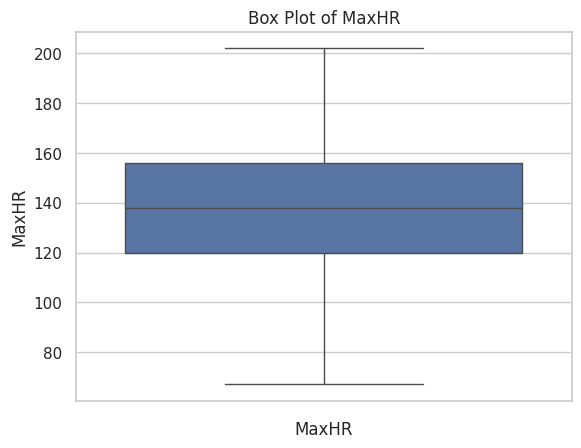

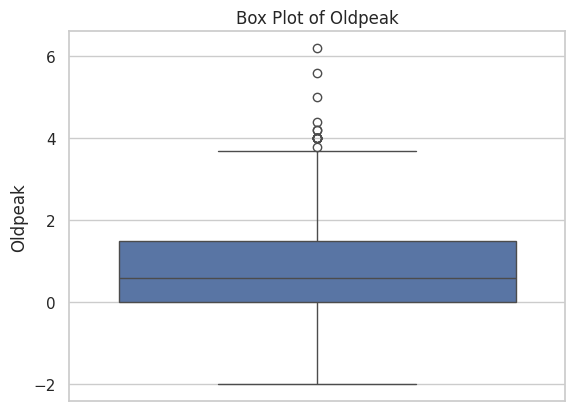

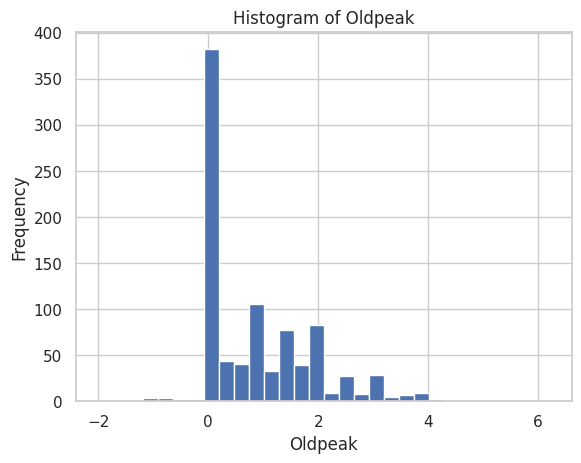

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
320   59    1              1        125          223          1           0   
321   63    1              2        100          223          1           0   
322   38    0              2        105          223          1           0   
323   62    1              2        115          223          1           0   
325   42    1              2        105          223          1           0   
326   45    1              1        110          223          0           0   
327   59    1              2        125          223          1           0   
328   52    1              2         95          223          1           0   
329   60    1              2        130          223          1           1   
330   60    1              1        115       

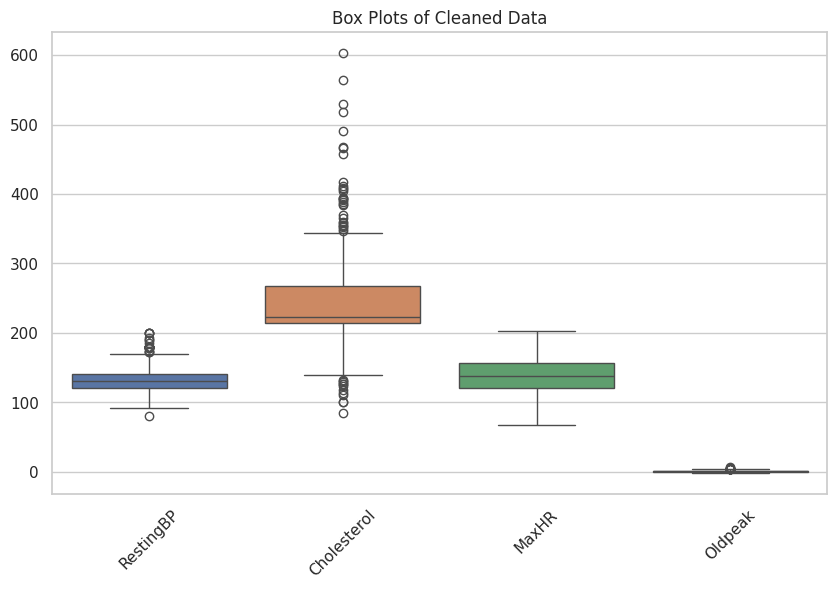

In [43]:
# Calculate the median MaxHR
median_maxhr = df['MaxHR'].median()

# Replace the anomalous values with the median
df['MaxHR'] = df['MaxHR'].replace([63, 60], median_maxhr)

df_subset = df.iloc[370:394]  # Remember, the ending index in iloc is exclusive, so use 394
print(df_subset)


# Create a boxplot of 'MaxHR' to visualize its distribution
sns.boxplot(data=df['MaxHR'])  # Use the cleaned or filtered dataframe if necessary
plt.title('Box Plot of MaxHR')
plt.xlabel('MaxHR')
plt.show()

#------------------------------------------------------------------------------------------------
# Boxplot to visualize distribution of Oldpeak values
sns.boxplot(data=df['Oldpeak'])
plt.title('Box Plot of Oldpeak')
plt.show()

# Histogram to see distribution
plt.hist(df['Oldpeak'], bins=30)
plt.title('Histogram of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()


df = df[df['Oldpeak'] != -2.6]

# Check if the outlier is removed
print(df[df['Oldpeak'] == -2.6])

df_subset = df.iloc[320:330]  # Remember, the ending index in iloc is exclusive, so use 394
print(df_subset)

#-------------------------------------------------------------------------------------------------

# Calculate the median of the Cholesterol column
median_cholesterol = df['Cholesterol'].median()

# Replace 0 values in the Cholesterol column with the calculated median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

# Verify that 0 values have been replaced
print(df[df['Cholesterol'] == 0])  # This should return an empty DataFrame

df_subset = df.iloc[394:409]  # Remember, the ending index in iloc is exclusive, so use 394
print(df_subset)

#----------------------------------------------------------------------------------------------------

# Remove rows where RestingBP is 0
df = df[df['RestingBP'] != 0]

# Verify that no rows with RestingBP = 0 are left
print(df[df['RestingBP'] == 0])  # This should return an empty DataFrame

#------------------------------------------------------------------------------------------------------

# Set the style of the plots
sns.set(style="whitegrid")

# List of numerical columns for box plots (customize as needed)
numerical_columns = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Replace with your actual column names

# Create a boxplot for each numerical feature in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots of Cleaned Data')
plt.xticks(rotation=45)
plt.show()

#-----------------------------------------------------------------------------------------------------------




In [36]:
df.to_csv('updated_heart_disease_dataset.csv', index=False)


In [38]:
updated_df = pd.read_csv('updated_heart_disease_dataset.csv')
print(updated_df.head())

files.download('updated_heart_disease_dataset.csv')

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              0        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              0        130          283          0           1   
3   48    0              2        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-44-346faec57e27>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-44-346faec57e27>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

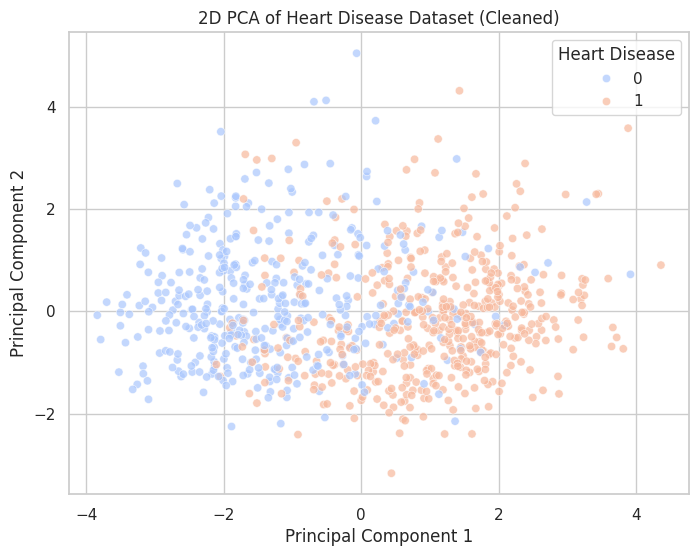

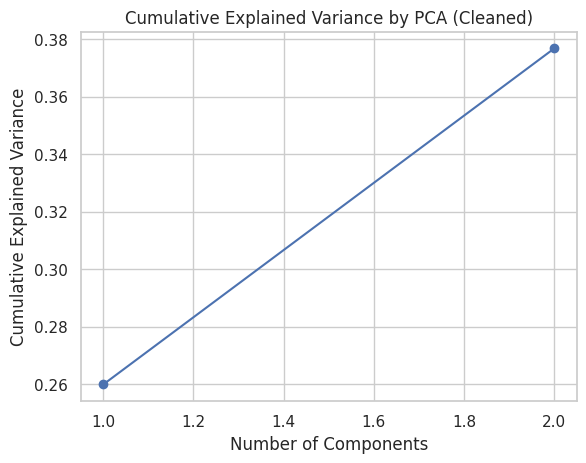

In [44]:
df_updated = pd.read_csv('updated_heart_disease_dataset.csv')


# Encode categorical features to numeric
df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df_updated.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df_updated.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df_updated.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df_updated.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Separate the target variable from the features
X_cleaned = df_updated.drop(columns=['HeartDisease'])
y_cleaned = df_updated['HeartDisease']

# Standardize the feature data
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Perform PCA with 2 components for dimensionality reduction
X_pca_cleaned = pca.fit_transform(X_scaled_cleaned)

# Convert PCA result to DataFrame
pca_df_cleaned = pd.DataFrame(X_pca_cleaned, columns=['PC1', 'PC2'])
pca_df_cleaned['HeartDisease'] = y_cleaned  # Add target variable for visualization

# Plot the 2D PCA for the cleaned dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df_cleaned, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset (Cleaned)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance for the cleaned dataset
explained_variance_cumsum_cleaned = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum_cleaned) + 1), explained_variance_cumsum_cleaned, marker='o')
plt.title('Cumulative Explained Variance by PCA (Cleaned)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
